# Fumar e Estresse: Fatores de predição para cancer? 

### Vamos verificar se o hábito de fumar e o nivel de estresse preveem o desenvolvimento de câncer. 

todo: verificar se não há outliers ,plotar graficos

todo: verificar se há multicolinearidade
https://etav.github.io/python/vif_factor_python.html

statsmodels.stats.outliers_influence.variance_inflation_factor


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Vamos começar importanto o dataset ```BancodeDados13.csv``` que foi adquirido nesse video do youtube e convertido de .sav para csv por esse script.
Também vamos separar os dados entre as features que será um numpy array de 2 colunas e as labels que será um numpy array unidimensional.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/desenvolvimentodecancer/master/BancodeDados13.csv')


Vamos analisar se a multicolinearidade atraves do VIF (variance inflation factor) , nesse caso queremos o valor para a variavel dependente cancer. tolerancia deve ser maior que 0.1 e vif deve ser menor que 10. Como VIF é 1/toleracia , para encontrar a tolerancia basta dividir 1 por VIF

In [4]:

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

const        8.549777
Estresse     1.648013
Hab_Fumar    1.962513
Câncer       1.594647
dtype: float64

Primeiro , eu quero testar como ficar a acertividade do modelo quando fazemos um modelo de regressão logistica usando tanto o habito de fumar (que graças as VIF e a tolerancia sabemos que exerce influencia se a pessoa pode ou não desenvolver cancer). Depois compararemos usando apenas um modelo que seleciona parametricamente 

Abaixo separamamos o dataset em quatro usando o ```train_test_split``` para criar um dataframe de teste e um dataframe de treino e printamos o tamanho dos respectivos datasets

In [6]:

X_train, X_test , y_train, y_test = train_test_split(df.drop(['Câncer'],axis=1),df['Câncer'],test_size=0.3, random_state=0)

print(len(X_train),len(X_test),len(y_train),len(y_test))



featureModelOne = X_train
labelModelOne = y_train

49 21 49 21


Abaixo criamos um instacia de ```LogisticRegression``` e chamamos de model, passamos o parametros de treino e suas etiquetas

In [7]:
model = LogisticRegression()
model.fit(featureModelOne,labelModelOne)

modelOnePredictions = model.predict(X_test)

from sklearn.metrics import classification_report

classification_report( y_test, modelOnePredictions)




'              precision    recall  f1-score   support\n\n         0.0       0.71      0.71      0.71         7\n         1.0       0.86      0.86      0.86        14\n\n    accuracy                           0.81        21\n   macro avg       0.79      0.79      0.79        21\nweighted avg       0.81      0.81      0.81        21\n'

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,modelOnePredictions)

array([[ 5,  2],
       [ 2, 12]])

É possivel usar ```accuracy_score``` pra checar qual a acuracia do modelo logistico

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,modelOnePredictions)

# Contra Prova

### Vamos usar apenas Hab_Fumar para tentar entender se o nivel de stress melhora ou piora nosso modelo



In [0]:
df["Hypothesis"] = 0
df.loc[df.Hab_Fumar == 1.0,"Hypothesis"] = 1

df['Result'] = 0
df.loc[df.Câncer == df["Hypothesis"],"Result"] = 1

print(df['Result'].value_counts(normalize=True))


1    0.8
0    0.2
Name: Result, dtype: float64


In [0]:
df.head()

,Estresse,Hab_Fumar,Câncer,Hypothesis,Result
0,24.0,0.0,0.0,0,1
1,26.0,0.0,0.0,0,1
2,30.0,0.0,0.0,0,1
3,31.0,0.0,0.0,0,1
4,36.0,0.0,0.0,0,1


In [0]:
df["Estresse"].max()

dfteste = df
for i in range(len(df['Hab_Fumar'])):
    if df['Hab_Fumar'][i] == 1:
        dfteste['Hab_Fumar'][i] = 'Fumante'
    else:
        dfteste['Hab_Fumar'][i] = 'Não Fumante'

/home/hironu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
dfteste.head()

,Estresse,Hab_Fumar,Câncer,Hypothesis,Result
0,24.0,Não Fumante,0.0,0,1
1,26.0,Não Fumante,0.0,0,1
2,30.0,Não Fumante,0.0,0,1
3,31.0,Não Fumante,0.0,0,1
4,36.0,Não Fumante,0.0,0,1


In [9]:
observation = np.array([[33,6],[8,23]])
stats.chi2_contingency(observation,correction =False)[1] < 0.05

True

Teste de qui-quadrado resultou menor que 0.05 então sabemos que hab fumar tem influncia sobre a pessoa ter cancer ou não 


Vamos plotar um grafico e ver como é a distruição dos niveis de estresse entre as pessoas com cancer ou sem cancer

Como podemos ver abaixo os niveis de estresse são bem distribuidos entre as pessoas com cancer


(array([3., 4., 2., 5., 5., 2., 5., 4., 3., 6.]),
 array([24. , 29.9, 35.8, 41.7, 47.6, 53.5, 59.4, 65.3, 71.2, 77.1, 83. ]),
 <a list of 10 Patch objects>)

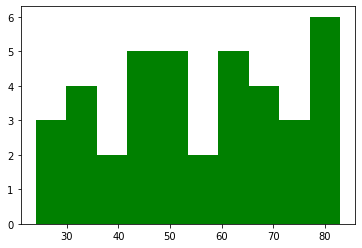

In [10]:
plt.hist(df.Estresse[df['Câncer'] == 1],color='green')

Também é possivel notar que a maior parte das pessoas que não tem cancer tem seus nivels de estresse abaixo de 50%

In [11]:
metademenos = []
metademais = []
for i in range(len(df['Estresse'])):
    if df['Estresse'][i] < 55:
        metademenos.append(1)
    else:
        metademais.append(1)
        
print("Pessoas com nivel de estresse abaixo de 55%(sem cancer)",sum(metademenos)/(sum(metademenos)+sum(metademais))*100,"%")

print("Pessoas com nivel de estresse acima de 55%(sem cancer)",sum(metademais)/(sum(metademenos)+sum(metademais))*100,'%')

Pessoas com nivel de estresse abaixo de 55%(sem cancer) 64.28571428571429 %
Pessoas com nivel de estresse acima de 55%(sem cancer) 35.714285714285715 %


(array([6., 8., 6., 4., 1., 1., 0., 3., 0., 2.]),
 array([24., 29., 34., 39., 44., 49., 54., 59., 64., 69., 74.]),
 <a list of 10 Patch objects>)

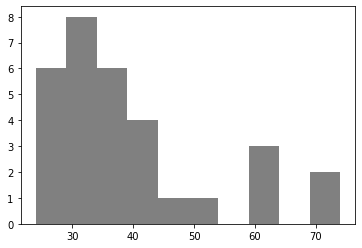

In [12]:
plt.hist(df.Estresse[df['Câncer'] == 0],color='gray')

Vamos tentar encontrar as pessoas não fumantes com alto nivel de estresse. Sendo alto nivel de estresse acima de 80 pois em nosso dataset não houve ocorrencia de pessoas sem cancer com nivel de estresse acima de 80.

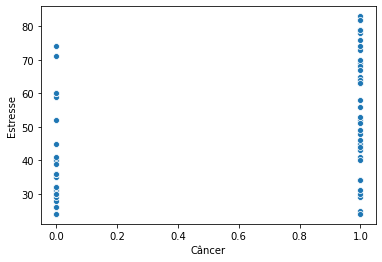

In [13]:
sns.scatterplot(df['Câncer'],df['Estresse'])

In [14]:
anylevelnocancer = df.Estresse[df['Câncer'] == 0].value_counts().sum()
anylevelcancer = df.Estresse[df['Câncer'] == 1].value_counts().sum()
print("Pessoas sem cancer com qualquer nivel de estresse",(anylevelnocancer/70)*100,'%')
print("Pessoas com cancer com qualquer nivel de estresse ",(anylevelcancer/70)*100, '%' )




Pessoas sem cancer com qualquer nivel de estresse 44.285714285714285 %
Pessoas com cancer com qualquer nivel de estresse  55.714285714285715 %


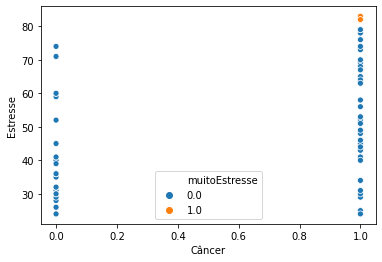

In [18]:


df['muitoEstresse'] = df['Estresse']

for i in range(len(df['Estresse'])):
    if df['Estresse'][i] > 80.0:
        df['muitoEstresse'][i] = 1
    else:
        df['muitoEstresse'][i] = 0

sns.scatterplot(df['Câncer'],df['Estresse'],hue=df['muitoEstresse'])        

# Fumante + Auto Estresse



In [22]:
dfhip2 = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/desenvolvimentodecancer/master/BancodeDados13.csv')

dfhip2['muitoEstresse'] = dfhip2['Estresse']

for i in range(len(dfhip2['Estresse'])):
    if dfhip2['Estresse'][i] > 80.0:
        dfhip2['muitoEstresse'][i] = 1
    else:
        dfhip2['muitoEstresse'][i] = 0


dfhip2["Hypothesis"] = 0
dfhip2.loc[dfhip2.Hab_Fumar == 1.0,"Hypothesis"] = 1

dfhip2['Result'] = 0
dfhip2.loc[dfhip2.Câncer == dfhip2["Hypothesis"],"Result"] = 1

print(dfhip2['Result'].value_counts())

print(56/(56+14))


1    56
0    14
Name: Result, dtype: int64
0.8
